<img src='https://wizardsourcer.com/wp-content/uploads/2019/03/Stackoverflow.png' width="400"></img>


## <center><h1>  A Data Analysis using Stackoverflow’s 2019 and 2020 Annual Developer Survey - Colombia.</h1></center>

> ## By Camilo Peñaranda


## Each stage of the CRISP-DM process. These stages are:


* [1. Business Understanding](#section1)
* [2. Data Understanding.](#section2)
* [3. Prepare Data.](#section3)
* [4. Data Modeling.](#section4)
* [5. Evaluate the Results.](#section5)



<a id="section1"></a>
### <font color="#004D7F"> 1. Business Understanding  </font>

In this notebook, I will be exploring the 2019 and 2020 Stack Overflow results in order to glean some information on professional developers and what to focus on to have the best career in Colombia.

There will be three questions I will seek to answer in order to get this information:

1. What Programming Languages are most used to work and Which Programming Languages are most Required in Stackoverflow survey data of 2019 and 2020 ?
2. How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in Colombua According to Stackoverflow survey data of 2019 and 2020?
3. What are the most wanted Programming Languages in Colombia According to Stackoverflow survey data of 2019 and 2020?

<a id="section2"></a>
### <font color="#004D7F"> 2. Data understanding  </font>

In order to gain some understanding of the data. I have to do these steps:
* Handle categorical and missing data
* Analyze, Model, and Visualize

In [1]:
# import python libraries to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

#make plots
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display graphs in jupyter notebook
%matplotlib inline

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)



In [2]:
# Loading Stackoverflow survey data of 2019 and 2020
# Ref link: https://insights.stackoverflow.com/survey
df_2019 = pd.read_csv('survey_results_public_2019.csv')
df_2020 = pd.read_csv('survey_results_public_2020.csv')

In [3]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [4]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

<a id="section3"></a>
### <font color="#004D7F"> 3. Prepare Data </font>


In [5]:
rows, columns =  df_2019.shape[0], df_2019.shape[1]
print(f'Number of rows and columns of 2019 Developer Survey: {rows}, {columns}')

Number of rows and columns of 2019 Developer Survey: 88883, 85


In [6]:
rows, columns =  df_2020.shape[0], df_2020.shape[1]
print(f'Number of rows and columns of 2020 Developer Survey: {rows}, {columns}')

Number of rows and columns of 2020 Developer Survey: 64461, 61


In [7]:
#precentage missing values: 2019 Developer Survey
print(df_2019.isnull().sum()/df_2019.shape[0])

Respondent      0.000000
MainBranch      0.006210
Hobbyist        0.000000
OpenSourcer     0.000000
OpenSource      0.022963
                  ...   
Sexuality       0.143289
Ethnicity       0.137428
Dependents      0.065524
SurveyLength    0.021365
SurveyEase      0.020274
Length: 85, dtype: float64


In [8]:
#precentage missing values: 2020 Developer Survey
print(df_2020.isnull().sum()/df_2020.shape[0])

Respondent            0.000000
MainBranch            0.004638
Hobbyist              0.000698
Age                   0.294985
Age1stCode            0.101782
                        ...   
WebframeWorkedWith    0.344115
WelcomeChange         0.182715
WorkWeekHrs           0.361614
YearsCode             0.105133
YearsCodePro          0.280976
Length: 61, dtype: float64


In [9]:
#dtype check 2019 Developer Survey
df_2019.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [10]:
#dtype check 2020 Developer Survey
df_2020.dtypes

Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

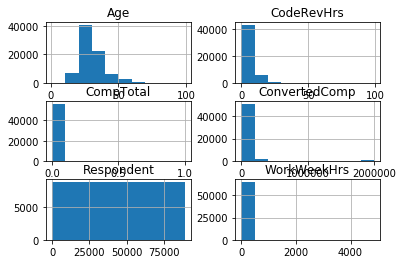

In [11]:
#dist 2019 Developer Survey
df_2019.hist();

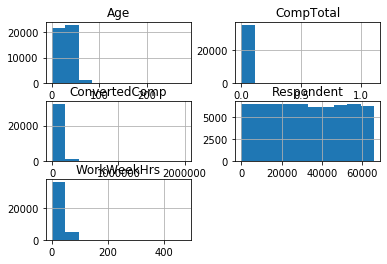

In [12]:
#dist 2020 Developer Survey
df_2020.hist();

In [13]:
#decribe 2019 Developer Survey
df_2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [14]:
#decribe 2020 Developer Survey
df_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [32]:
#Missing Values in Data - Imput 
def imput (x):
    columns=x.columns.tolist()
    del_ = []
    for i in range(len(x.isnull().sum())):
        if x.isnull().sum()[i]/x.shape[0] < 0.35:
            if x[columns[i]].dtypes == object:
                x[columns[i]].fillna(x[columns[i]].mode()[0] , inplace = True)
            else: 
                x[columns[i]].fillna(x[columns[i]].median() , inplace = True)
        else: 
            del_.append(columns[i])
    x.drop(del_, axis = 1, inplace = True)


In [33]:
#Missing Values in Data - Imput
imput(df_2019)
imput(df_2020)

In [34]:
#precentage missing values: 2019 Developer Survey
print(df_2019.isnull().sum()/df_2019.shape[0])

Respondent      0.0
MainBranch      0.0
Hobbyist        0.0
OpenSourcer     0.0
OpenSource      0.0
               ... 
Sexuality       0.0
Ethnicity       0.0
Dependents      0.0
SurveyLength    0.0
SurveyEase      0.0
Length: 81, dtype: float64


In [35]:
#precentage missing values: 2020 Developer Survey
print(df_2020.isnull().sum()/df_2020.shape[0])

Respondent                      0.0
MainBranch                      0.0
Hobbyist                        0.0
Age                             0.0
Age1stCode                      0.0
Country                         0.0
CurrencyDesc                    0.0
CurrencySymbol                  0.0
DatabaseDesireNextYear          0.0
DatabaseWorkedWith              0.0
DevType                         0.0
EdLevel                         0.0
Employment                      0.0
Ethnicity                       0.0
Gender                          0.0
JobFactors                      0.0
JobSat                          0.0
JobSeek                         0.0
LanguageDesireNextYear          0.0
LanguageWorkedWith              0.0
MiscTechDesireNextYear          0.0
NEWCollabToolsDesireNextYear    0.0
NEWCollabToolsWorkedWith        0.0
NEWDevOps                       0.0
NEWEdImpt                       0.0
NEWJobHunt                      0.0
NEWLearn                        0.0
NEWOffTopic                 



### What Programming Languages are most used to work and Which Programming Languages are most Required in  Stackoverflow survey data of 2019 and 2020 ?

In [19]:
#First make copy of dataframe and then Filter a dataframe by country 
def filter_country(df, column_filter, country, column1,column2 ): 
    '''
    Filter a dataframe by country(i.e. why i use dropna to drop all other country excpet Colombia)
    Returns filtred dataframe
    '''
    df_copy = df
    df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column1, column2])
        
    return df_copy

# Filtering the dataframe 
col_2019 = filter_country(df_2019, 'Country', 'Colombia', 'LanguageWorkedWith', 'LanguageDesireNextYear')
col_2020 = filter_country(df_2020, 'Country', 'Colombia', 'LanguageWorkedWith', 'LanguageDesireNextYear')

In [20]:
col2019, col2020 =  col_2019.shape[0], col_2020.shape[0]
print(f'Nro 2019 and 2020: {col2019}, {col2020}' )

Nro 2019 and 2020: 292, 242


In [21]:
def split_column(df, column):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe by columns.
worked_languages_2019 = split_column(col_2019, 'LanguageWorkedWith')
wanted_languages_2019 = split_column(col_2019, 'LanguageDesireNextYear')

worked_languages_2020= split_column(col_2020, 'LanguageWorkedWith')
wanted_languages_2020 = split_column(col_2020, 'LanguageDesireNextYear')

In [22]:
#Just Flating a nested list
def flat(array_list):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2019 = flat(worked_languages_2019)
list_wanted_languages_2019 = flat(wanted_languages_2019)

list_worked_languages_2020 = flat(worked_languages_2020)
list_wanted_languages_2020 = flat(wanted_languages_2020)

In [23]:
def list_of_group(data_list, year):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict

# Grouping the list and creating a dict.
dict_worked_languages_2019 = list_of_group(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = list_of_group(list_wanted_languages_2019, '2019')

dict_worked_languages_2020 = list_of_group(list_worked_languages_2020, '2020')
dict_wanted_languages_2020 = list_of_group(list_wanted_languages_2020, '2020')

<a id="section4"></a>
### <font color="#004D7F"> 4. Data Modeling </font>


In [24]:
#Ref: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and append them,
    Returns a appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

worked_languages = create_dataframe([dict_worked_languages_2019, dict_worked_languages_2020])
wanted_languages = create_dataframe([dict_wanted_languages_2019, dict_wanted_languages_2020])

In [25]:
#Adding Percentage to worked_languages and wanted_languages dataframe
def percentage(df, column):
    '''
    Scale data,
    Returns data scaled.
    '''
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [26]:
# Get the top 12 languages
top_12_work = worked_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()
top_12_want = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_12_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_12_want)]

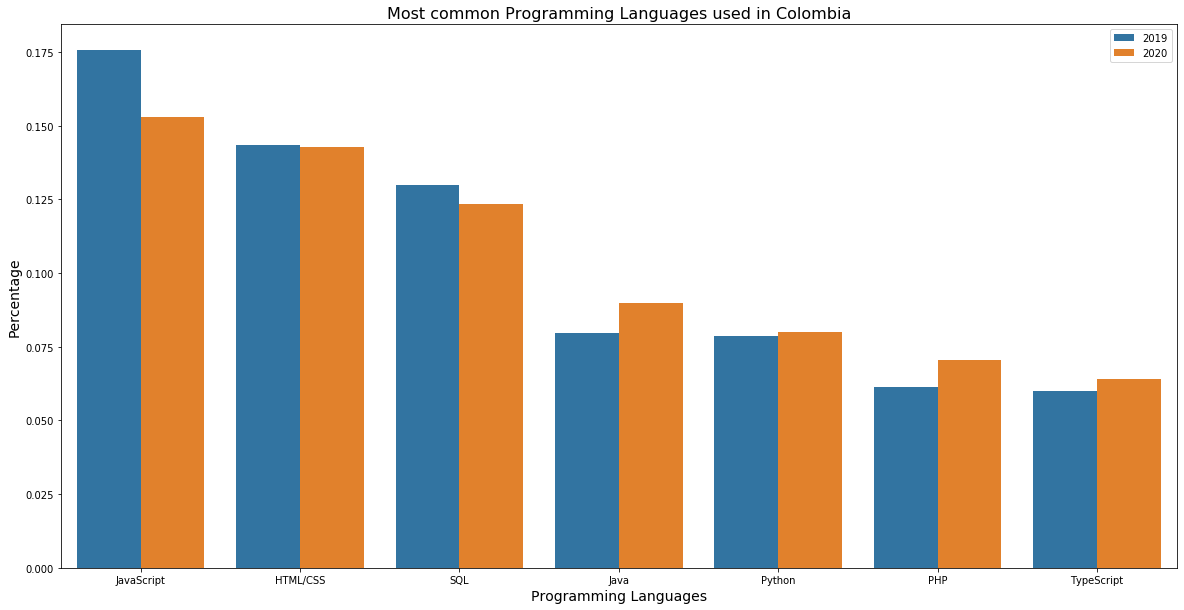

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Programming Languages", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(title_fontsize='40')
plt.title('Most common Programming Languages used in Colombia', size = 16)
plt.show()

## Evaluate the Results

* The Highest Rate of percentage among all Programming Languages JavaScript have highest growth rate in 2019 which is around 18% whereas this percentage is drop significantly in 2020 about 2% in Colombia.


### How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in Colombia According to Stackoverflow survey data of 2019 and 2020?

### Prepare Data

In [28]:
row = []
for j,k in list(zip(worked_languages_2019, wanted_languages_2019)):
    for i in j:
        row.append({
            'Worked_Programming_Languages': i, 
            'Wanted_Programming_Languages': Counter(k)
        })
        
programming_language_transition = pd.DataFrame(row).groupby('Worked_Programming_Languages')\
                                            .agg({'Wanted_Programming_Languages': 'sum'}).reset_index()

### Data Modeling

In [29]:
for row in programming_language_transition['Worked_Programming_Languages']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    try:
        total = sum([value for key, value in dict(row['Wanted_Programming_Languages']).items()])
        for key, value in dict(row['Wanted_Programming_Languages']).items():
             programming_language_transition[key].loc[index] = (value / total)
    except:
        continue

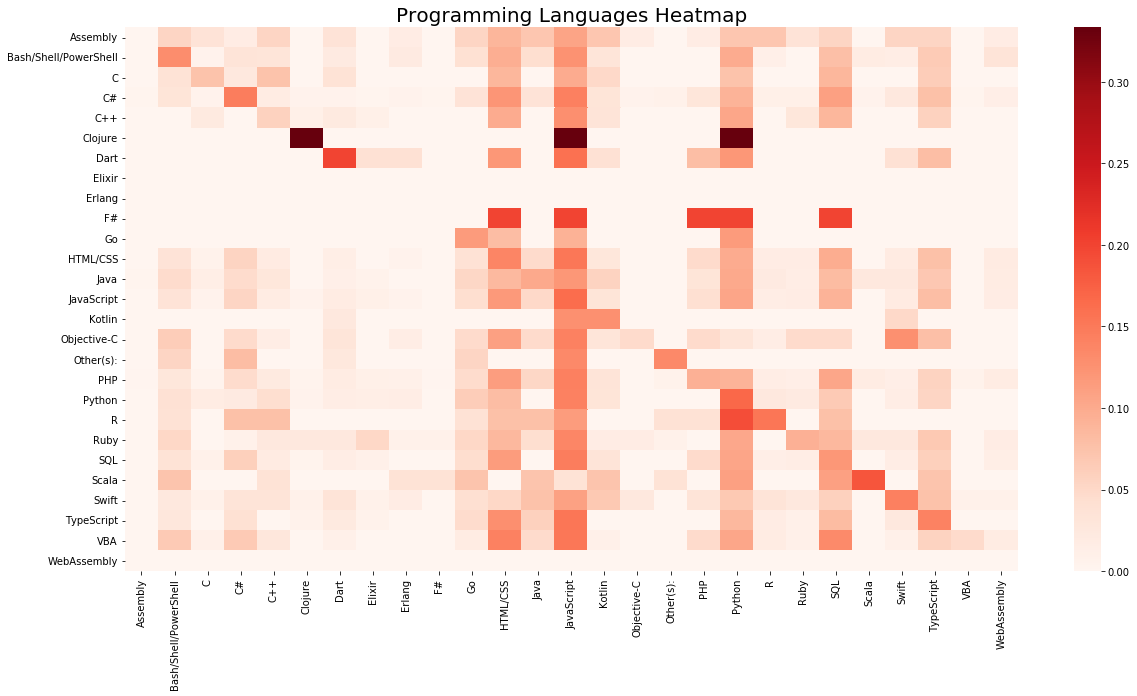

In [30]:
prlt = programming_language_transition.drop('Wanted_Programming_Languages', axis=1)\
                                        .set_index('Worked_Programming_Languages')

plt.figure(figsize=(20, 10))
sns.heatmap(prlt, cmap = "Reds")
plt.title('Programming Languages Heatmap', size = 20)
plt.ylabel('')
plt.show()

### Evaluate the Results

* With this Graph we can have some insights and they are:
  * `JavaScript` is highly correlated with every Programming Language (except: Elixir, Erlang and Scala) and `HTML/CSS` also have same trends.
  * There are around 27 Programming Language which has nearly no correlation among them with anyone.
  * `JavaScript` has strongest correlation with `Clojure` (i.e. about `25% to 30%`).


### What are the most wanted Programming Languages in Colombia According to Stackoverflow survey data of 2019 and 2020?

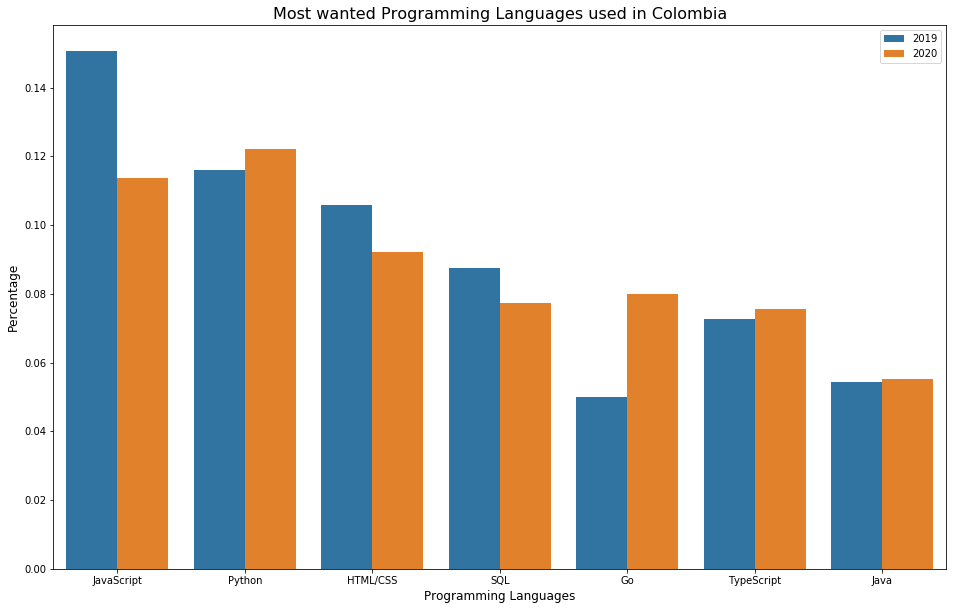

In [31]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = wanted_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Colombia', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

### Evaluate the Results

* Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.